###Setup the environnement

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
!pip install --upgrade tigramite
import tigramite.data_processing as pp
import tigramite.pcmci as pcmci
from tigramite.independence_tests.parcorr import ParCorr
# from tigramite.independence_tests.cmiknn import CMIknn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 5.2 MB/s eta 0:00:00


### Processing Chain graph

In [ ]:
!pip install diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Environnement d'expérimentation", show=False, filename="mon_diagramme"):
    # ... (Contenu du diagramme) ...
    with Cluster("Source de données"):
        yahoo_finance = EC2("Yahoo Finance")

    with Cluster("Extraction et Prétraitement"):
        extraction = EC2("Extraction avec yfinance")
        pretraitement = EC2("Nettoyage des données")

    with Cluster("Analyse causale"):
        pcmci = RDS("PCMCI")

    with Cluster("Résultats"):
        graphe_causal = ELB("Graphe causal")
        tableau_liens = ELB("Tableau des liens")

    yahoo_finance >> extraction >> pretraitement >> pcmci >> graphe_causal
    pcmci >> tableau_liens

### few test

In [ ]:

# Télécharger les données financières d'Apple
ticker = 'AAPL'

# Récupérer les états financiers
financials = yf.Ticker(ticker).quarterly_financials.T
cashflow = yf.Ticker(ticker).quarterly_cashflow.T
financialsY = yf.Ticker(ticker).financials.T
cashflowY = yf.Ticker(ticker).cashflow.T

# Afficher les colonnes pour voir lesquelles sont disponibles
print("\nDonnées financières :")
print(financials.columns)
print("\nFlux de trésorerie :")
print(cashflow.columns)




Données financières :
Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',

In [ ]:

# # Afficher les données financières finales
# filtered_data = financial_data[financial_data.index.year == 2022]

def preprocess(dataset,name):
  NAME = name.upper()
  name = pd.DataFrame(dataset)
  name.index = pd.to_datetime(name.index).tz_localize(None)
  name = name.resample('ME').mean()
  name.dropna(inplace=True)
  print(f"\n{NAME} :")
  print(name.to_string())


preprocess(financialsY,'financial_dataY')
preprocess(cashflowY,'cashflow_dataY')
preprocess(financials,'financial_data')
preprocess(cashflow,'cashflow_data')


FINANCIAL_DATAY :
           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA Net Income From Continuing Operation Net Minority Interest Reconciled Depreciation Reconciled Cost Of Revenue          EBITDA            EBIT Net Interest Income Interest Expense Interest Income Normalized Income Net Income From Continuing And Discontinued Operation  Total Expenses Total Operating Income As Reported Diluted Average Shares Basic Average Shares Diluted EPS Basic EPS Diluted NI Availto Com Stockholders Net Income Common Stockholders     Net Income Net Income Including Noncontrolling Interests Net Income Continuous Operations  Tax Provision   Pretax Income Other Income Expense Other Non Operating Income Expenses Net Non Operating Interest Income Expense Interest Expense Non Operating Interest Income Non Operating Operating Income Operating Expense Research And Development Selling General And Administration    Gross Profit Cost Of Revenue   Total Revenue Operating Revenue
2021-09-

In [ ]:
import yfinance as yf

# Instantiate the Ticker object for AAPL (Apple Inc.)
msft = yf.Ticker("AAPL")

# Get historical market data with a specific start and end date
hist = msft.history(start="2018-01-01", end="2024-12-31")

# Access historical annual income statement
annual_income = msft.income_stmt
print(annual_income)

# Access historical quarterly income statement
quarterly_income = msft.quarterly_income_stmt
print(quarterly_income)


# msft = yf.Ticker("AAPL")

# # get all stock info
# msft.info

# # get historical market data
# hist = msft.history(period="1mo")

# # show meta information about the history (requires history() to be called first)
# msft.history_metadata

# # show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# # show share count
# #msft.get_shares_full(start="2019-01-01", end="2020-01-01")
# # show financials:
# msft.calendar
# msft.sec_filings
# # - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# # - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
# # - cash flow statement
# msft.cashflow
# msft.quarterly_cashflow
# # see `Ticker.get_income_stmt()` for more options

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.240912   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

### DATA1 Annual and quarter financial



In [ ]:

################################################################################
# Define the ticker symbol
ticker_symbol = "AAPL"

# Initialize the Ticker
ticker = yf.Ticker(ticker_symbol)

# Fetch various financial datasets and transpose them for easier merging
annual_income = ticker.income_stmt.T
quarterly_income = ticker.quarterly_income_stmt.T
annual_cashflow = ticker.cashflow.T
quarterly_cashflow = ticker.quarterly_cashflow.T
annual_balance_sheet = ticker.balance_sheet.T
quarterly_balance_sheet = ticker.quarterly_balance_sheet.T

# Combine annual and quarterly datasets by prioritizing quarterly data, using `combine_first`
income_combined = quarterly_income.combine_first(annual_income)
cashflow_combined = quarterly_cashflow.combine_first(annual_cashflow)
balance_sheet_combined = quarterly_balance_sheet.combine_first(annual_balance_sheet)

# Rename columns for easier identification
income_combined.columns = [f"Income_{col}" for col in income_combined.columns]
cashflow_combined.columns = [f"Cashflow_{col}" for col in cashflow_combined.columns]
balance_sheet_combined.columns = [f"Balance_{col}" for col in balance_sheet_combined.columns]

# Merge all combined datasets into a single DataFrame based on the date index
financial_data = (
    income_combined
    .join(cashflow_combined, how="outer")
    .join(balance_sheet_combined, how="outer")
)

# Display the merged dataset
print(financial_data.to_string())


           Income_Tax Effect Of Unusual Items Income_Tax Rate For Calcs Income_Normalized EBITDA Income_Net Income From Continuing Operation Net Minority Interest Income_Reconciled Depreciation Income_Reconciled Cost Of Revenue   Income_EBITDA     Income_EBIT Income_Net Interest Income Income_Interest Expense Income_Interest Income Income_Normalized Income Income_Net Income From Continuing And Discontinued Operation Income_Total Expenses Income_Total Operating Income As Reported Income_Diluted Average Shares Income_Basic Average Shares Income_Diluted EPS Income_Basic EPS Income_Diluted NI Availto Com Stockholders Income_Net Income Common Stockholders Income_Net Income Income_Net Income Including Noncontrolling Interests Income_Net Income Continuous Operations Income_Tax Provision Income_Pretax Income Income_Other Income Expense Income_Other Non Operating Income Expenses Income_Net Non Operating Interest Income Expense Income_Interest Expense Non Operating Income_Interest Income Non Ope

In [ ]:

# Fill or drop missing values as needed
financial_data_clean = financial_data.loc[:, financial_data.isnull().mean() < 0.4]
#financial_data_clean = financial_data_clean.iloc[:,:15]
financial_data_clean = financial_data_clean.fillna(method="ffill").fillna(method="bfill")

# Drop any remaining rows with missing values (if any)
financial_data_clean = financial_data_clean.dropna()
#financial_data_clean = financial_data_clean.loc[:, financial_data_clean.isnull().mean() > 0.1]
# Optional: Log transform to reduce non-stationarity (use only if necessary)
#financial_data_clean = financial_data_clean.apply(lambda x: np.log(x + 1))

print(financial_data_clean.to_string())
print(financial_data_clean.shape)

            Income_Tax Effect Of Unusual Items  Income_Tax Rate For Calcs  Income_Normalized EBITDA  Income_Net Income From Continuing Operation Net Minority Interest  Income_Reconciled Depreciation  Income_Reconciled Cost Of Revenue  Income_EBITDA   Income_EBIT  Income_Normalized Income  Income_Net Income From Continuing And Discontinued Operation  Income_Total Expenses  Income_Total Operating Income As Reported  Income_Diluted Average Shares  Income_Basic Average Shares  Income_Diluted EPS  Income_Basic EPS  Income_Diluted NI Availto Com Stockholders  Income_Net Income Common Stockholders  Income_Net Income  Income_Net Income Including Noncontrolling Interests  Income_Net Income Continuous Operations  Income_Tax Provision  Income_Pretax Income  Income_Other Income Expense  Income_Other Non Operating Income Expenses  Income_Operating Income  Income_Operating Expense  Income_Research And Development  Income_Selling General And Administration  Income_Gross Profit  Income_Cost Of Revenue

<ipython-input-3-2e7f51a42d94>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  financial_data_clean = financial_data_clean.fillna(method="ffill").fillna(method="bfill")
<ipython-input-3-2e7f51a42d94>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  financial_data_clean = financial_data_clean.fillna(method="ffill").fillna(method="bfill")


In [ ]:
import pandas as pd

# Supposons que `financial_data` est votre DataFrame initial
# Exemple d'un DataFrame fictif
# financial_data = pd.DataFrame({...})

# Calculer la matrice de corrélation
corr_matrix = financial_data_clean.corr().abs()  # On utilise .abs() pour prendre les valeurs absolues

# Définir un seuil de corrélation
threshold = 0.8  # Vous pouvez ajuster ce seuil

# Trouver les colonnes à supprimer
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Si la corrélation est supérieure au seuil
            colname = corr_matrix.columns[i]  # Nom de la colonne à supprimer
            to_drop.add(colname)

# Supprimer les colonnes en double
financial_data_clean = financial_data_clean.drop(columns=to_drop)

print("Colonnes supprimées : ", to_drop)
print("Nouveau DataFrame : ", financial_data_clean.shape)
print("Colonnes conservées : ", financial_data_clean.columns)


Colonnes supprimées :  set()
Nouveau DataFrame :  (10, 12)
Colonnes conservées :  Index(['Income_Tax Effect Of Unusual Items', 'Income_Tax Rate For Calcs',
       'Income_Normalized EBITDA', 'Income_Other Income Expense',
       'Cashflow_Beginning Cash Position',
       'Cashflow_Change In Account Payable', 'Cashflow_Change In Inventory',
       'Cashflow_Change In Other Current Liabilities',
       'Cashflow_Changes In Cash', 'Cashflow_End Cash Position',
       'Balance_Accounts Payable', 'Balance_Current Assets'],
      dtype='object')


In [ ]:
# Correlation matrix heatmap
# Calculate the correlation matrix of the financial data
corr_matrix = financial_data_clean.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Display the correlation values
    color_continuous_scale="RdBu_r",  # Use a valid Plotly Express color scale
    aspect="auto",  # Adjust aspect ratio to fit better
)

# Customize the layout
fig.update_layout(
    title="Correlation Matrix of Financial Data",
    width=900,  # Customize width for better readability
    height=800,  # Customize height for better readability
)

# Show the plot
fig.show()

### DATA2 Bourse

In [ ]:
def get_apple_data(start_date, end_date):
    apple = yf.Ticker('AAPL')
    apple_data = apple.history(start=start_date, end=end_date)

    return apple_data

In [ ]:
#Define the period to retrieve the data
start_date = '2000-01-01'
end_date = '2024-12-16'

# Get the data for the specified period
apple_df = get_apple_data(start_date, end_date)

# Remove timezone information from the index (dates)
apple_df.index = apple_df.index.tz_localize(None)

# Remove rows with NaN values (resulting from the lagging process)
apple_df = apple_df.dropna()

# Export the dataset to an Excel file
apple_df.to_excel('data.xlsx', index=True)
print("The file 'data.xlsx' has been created.")

# Display the modified dataset
from IPython.display import display
display(apple_df)

The file 'data.xlsx' has been created.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,0.789884,0.847313,0.765877,0.843076,535796800,0.0,0.0
2000-01-04,0.815304,0.833191,0.762111,0.771997,512377600,0.0,0.0
2000-01-05,0.781410,0.832720,0.775762,0.783293,778321600,0.0,0.0
2000-01-06,0.799299,0.805889,0.715509,0.715509,767972800,0.0,0.0
2000-01-07,0.726806,0.760699,0.719275,0.749401,460734400,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09,241.830002,247.240005,241.750000,246.750000,44649200,0.0,0.0
2024-12-10,246.889999,248.210007,245.339996,247.770004,36914800,0.0,0.0
2024-12-11,247.960007,250.800003,246.259995,246.490005,45205800,0.0,0.0


In [ ]:
financial_data_clean=apple_df.drop(columns=['Dividends', 'Stock Splits'])
print(financial_data_clean.to_string())
print(financial_data_clean.shape)

                  Open        High         Low       Close      Volume
Date                                                                  
2000-01-03    0.789884    0.847313    0.765877    0.843076   535796800
2000-01-04    0.815304    0.833191    0.762111    0.771997   512377600
2000-01-05    0.781410    0.832720    0.775762    0.783293   778321600
2000-01-06    0.799299    0.805889    0.715509    0.715509   767972800
2000-01-07    0.726806    0.760699    0.719275    0.749401   460734400
2000-01-10    0.768230    0.770113    0.713626    0.736221   505064000
2000-01-11    0.722570    0.748460    0.681617    0.698563   441548800
2000-01-12    0.715509    0.719275    0.651489    0.656668   976068800
2000-01-13    0.711625    0.743752    0.696680    0.728689  1032684800
2000-01-14    0.753167    0.770113    0.748460    0.756462   390376000
2000-01-18    0.760699    0.798358    0.756462    0.782823   459177600
2000-01-19    0.795533    0.819069    0.778587    0.802594   597643200
2000-0

In [ ]:
# Correlation matrix heatmap
# Calculate the correlation matrix of the financial data
corr_matrix = financial_data_clean.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Display the correlation values
    color_continuous_scale="RdBu_r",  # Use a valid Plotly Express color scale
    aspect="auto",  # Adjust aspect ratio to fit better
)

# Customize the layout
fig.update_layout(
    title="Correlation Matrix of Financial Data",
    width=900,  # Customize width for better readability
    height=800,  # Customize height for better readability
)

# Show the plot
fig.show()

### DATA3 BOURSE MULTI-VARIEE

In [ ]:

def get_stock_data(start_date, end_date, interval='1d'):
    """
    Récupère les données boursières pour une liste d'actions avec un intervalle de temps spécifié.

    Paramètres :
    - start_date : Date de début (au format 'YYYY-MM-DD')
    - end_date : Date de fin (au format 'YYYY-MM-DD')
    - interval : Intervalle de temps ('1m', '2m', '5m', '15m', '30m', '1h', '1d', '1wk', '1mo')

    Retourne :
    - DataFrame combiné contenant les données des actions.
    """
    import yfinance as yf

    tickers = {
        'Apple': 'AAPL',
        'Google': 'GOOGL',
        'Microsoft': 'MSFT',
        'Amazon': 'AMZN',
        #'Facebook': 'META',
        # 'Carrefour': 'CA.PA'
    }

    stock_data = {}

    for name, ticker in tickers.items():
        stock = yf.Ticker(ticker)
        data = stock.history(start=start_date, end=end_date, interval=interval)

        stock_data[f'Open_{name}'] = data['Open']
        stock_data[f'High_{name}'] = data['High']
        stock_data[f'Low_{name}'] = data['Low']
        stock_data[f'Close_{name}'] = data['Close']
        stock_data[f'Volume_{name}'] = data['Volume']

    combined_data = pd.DataFrame(stock_data)
    combined_data['Date'] = data.index
    return combined_data

In [ ]:
start_date = "2010-01-01"
end_date = "2024-12-31"

dataset = get_stock_data(start_date, end_date, interval="1d")
dataset = dataset.drop(columns=['Date'])
# Remove timezone information from the index (dates)
dataset.index = dataset.index.tz_localize(None)

# Remove rows with NaN values (resulting from the lagging process)
dataset = dataset.dropna()

# Suppression du fuseau horaire des colonnes datetime
if dataset.index.dtype == 'datetime64[ns, UTC]':
    dataset.index = dataset.index.tz_localize(None)  # Suppression du fuseau horaire pour l'index

for col in dataset.select_dtypes(include=['datetime64[ns, UTC]']):
    dataset[col] = dataset[col].dt.tz_localize(None)  # Suppression du fuseau horaire pour les colonnes

# Exportation du fichier Excel
dataset.to_excel('data.xlsx', index=True)
print("The file 'data.xlsx' has been created.")


# Display the modified dataset
from IPython.display import display
display(dataset)

The file 'data.xlsx' has been created.


,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Open_Google,High_Google,Low_Google,Close_Google,Volume_Google,Open_Microsoft,High_Microsoft,Low_Microsoft,Close_Microsoft,Volume_Microsoft,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Volume_Amazon
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.429938,6.462174,6.398305,6.447412,493729600,15.632769,15.696602,15.565197,15.627782,78169752,23.052240,23.413607,23.029654,23.300680,38409100,6.812500,6.830500,6.657000,6.695000,151998000
2010-01-05,6.465187,6.495012,6.424515,6.458559,601904800,15.638505,15.654962,15.497874,15.558963,120067812,23.225394,23.413606,23.067295,23.308207,49749600,6.671500,6.774000,6.590500,6.734500,177038000
2010-01-06,6.458558,6.484166,6.349198,6.355826,552160000,15.605590,15.605590,15.119365,15.166740,158988852,23.247979,23.398550,22.976955,23.165167,58182400,6.730000,6.736500,6.582500,6.612500,143576000
2010-01-07,6.379326,6.386858,6.297983,6.344077,477131200,15.195166,15.210128,14.777512,14.813666,256315428,23.059773,23.112473,22.728520,22.924261,50559700,6.600500,6.616000,6.440000,6.500000,220604000
2010-01-08,6.335641,6.386857,6.298285,6.386254,447610800,14.761304,15.041818,14.689242,15.011149,188783028,22.796264,23.247972,22.766149,23.082346,51197400,6.528000,6.684000,6.451500,6.676000,196610000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.770004,255.649994,253.449997,255.270004,40858800,192.619995,195.100006,190.149994,194.630005,25675000,436.739990,437.649994,432.829987,435.250000,19152500,225.009995,226.880005,223.899994,225.059998,28070000
2024-12-24,255.490005,258.209991,255.289993,258.200012,23234700,194.839996,196.110001,193.779999,196.110001,10403300,434.649994,439.600006,434.190002,439.329987,7164500,226.940002,229.139999,226.130005,229.050003,15007500
2024-12-26,258.190002,260.100006,257.630005,259.019989,27237100,195.149994,196.750000,194.380005,195.600006,12046600,439.079987,440.940002,436.630005,438.109985,8194200,228.500000,228.500000,226.669998,227.050003,16146700


In [ ]:
financial_data_clean = dataset

### PCMCI test 1

In [ ]:
# Create a dataframe for Tigramite and set up the time series data
dataframe = pp.DataFrame(financial_data_clean.values, var_names=financial_data_clean.columns)

# Set up the PCMCI model
pcmci_model = pcmci.PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr(significance='analytic'),
    verbosity=1
)

# Run PCMCI with a specified maximum lag
results = pcmci_model.run_pcmci(
    tau_min=0,
    tau_max=2,           # number of maximum lag to 1
    pc_alpha=0.05,        # Increase alpha for a less strict test
    # max_conds_dim=1      # Limit conditional independence to 1 variable
)
# Display causal discovery results
pcmci_model.print_significant_links(
    p_matrix=results["p_matrix"],
    val_matrix=results["val_matrix"],

)


/usr/local/lib/python3.10/dist-packages/tigramite/data_processing.py:308: UserWarning:

In analysis mode 'single', 'data'.shape = (10, 12); is it of shape (observations, variables)?




##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Income_Tax Effect Of Unusual Items has 0 link(s):

    Variable Income_Tax Rate For Calcs has 1 link(s):
        (Balance_Accounts Payable -2): max_pval = 0.00484, |min_val| =  0.943

    Variable Income_Normalized EBITDA has 0 link(s):

    Variable Income_Other Income Expense has 0 link(s):

    Variable Cashflow_Beginning Cash Position has 1 link(s):
        (Cashflow_Beginning Cash Position -2): max_pval = 0.04574, |min_val| =  0.820

    Variable Cashflow_Change In Account Payable has 0 link(s):

    Variable Cashflow_Change In Inventory has 0 link(s):

    Variable Cashflow_Change In Other Current Liabilities has 1 link(s):
        (Balance_Accounts Payable -2): max_pval = 0.02414, |min_val| =  0.870

    Variable Cashflow_Changes In Cas

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Préparer les données des arêtes
p_matrix = results["p_matrix"]
val_matrix = results["val_matrix"]
alpha_level = 0.05
edges = []

# Rassembler les liens significatifs
for lag in range(val_matrix.shape[2]):
    significant_links = np.where(val_matrix[:, :, lag] >= alpha_level)
    for i, j in zip(*significant_links):
        if i != j:
            edges.append({
                "x_start": i,
                "y_start": i,
                "x_end": j,
                "y_end": j,
                "strength": val_matrix[i, j, lag],
                "pval": p_matrix[i, j, lag]
            })

edges_df = pd.DataFrame(edges)

labels = list(financial_data_clean.columns)

# Disposition circulaire des nœuds
num_nodes = len(labels)
angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)  # Angles pour placer les nœuds en cercle
radius = 10  # Rayon du cercle
arrowloc = np.linspace(1, num_nodes, endpoint=False)
posi = num_nodes

nodes_df = pd.DataFrame({
    "x": radius * np.cos(angles),  # Coordonnées x
    "y": radius * np.sin(angles),  # Coordonnées y
    "label": labels
})

# Tracer les nœuds
fig = px.scatter(nodes_df, x="x", y="y", text="label", title="Network of Significant Causal Links")
fig.update_traces(marker=dict(size=15, color="lightcoral"), textposition="bottom center")

# Palette de couleur pour le gradient de -1 (bleu) à 1 (rouge)
color_scale = px.colors.diverging.RdBu_r

# Ajouter une échelle de couleur invisible pour la légende avec go.Scatter
fig.add_trace(
    go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(
            colorscale=color_scale,
            cmin=-1, cmax=1,
            colorbar=dict(
                title="Partial Correlation Strength",
                tickvals=[-1, 0, 1],
                ticktext=["-1 (Blue)", "0 (White)", "1 (Red)"],
                len=0.75
            )
        )
    )
)
arrow_annotations = []
arrowthresh = 0.7  # Position des flèches sur les relations
# Ajouter les arêtes avec orientation et couleur selon la corrélation
for _, edge in edges_df.iterrows():
    x0 = nodes_df.loc[edge["x_start"], "x"]
    y0 = nodes_df.loc[edge["y_start"], "y"]
    x1 = nodes_df.loc[edge["x_end"], "x"]
    y1 = nodes_df.loc[edge["y_end"], "y"]

    # Couleur du lien basée sur la force de la corrélation
    strength = edge["strength"]
    #normalized_strength = (strength + 1) / 2  # Conversion de [-1, 1] vers [0, 1]
    color_rgb = px.colors.sample_colorscale(color_scale, strength)

    # Vérifier que la couleur est une chaîne de caractères et non une liste
    if isinstance(color_rgb, list):
        color_rgb = color_rgb[0]  # Prendre la première couleur de la liste

    # Ajouter la ligne avec flèche
    fig.add_shape(
        type="line",
        x0=x0,
        y0=y0,
        x1=x1,
        y1=y1,
        line=dict(color=color_rgb, width=0.1)  # Épaisseur fixe
    )

    arrow_x = x0 + (x1 - x0) * arrowthresh
    arrow_y = y0 + (y1 - y0) * arrowthresh
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2

    arrow_annotations.append(
        dict(
            ax=x0,
            ay=y0,
            x=arrow_x,
            y=arrow_y,
            xref='x',
            yref='y',
            axref='x',
            ayref='y',
            showarrow=True,
            arrowhead=2,
            arrowsize=1.5,
            arrowwidth=1.5,
            arrowcolor=color_rgb
        )
    )
    arrow_annotations.append(
        dict(  # Ajouter l'annotation à la liste
            x=arrow_x,
            y=arrow_y,
            text=f'pval: {edge["pval"]:.4f}',
            font=dict(color=color_rgb, size=10),
            showarrow=False,  # Sans flèche pour l'annotation de la p-value
            xanchor="center",
            yanchor="middle"
        )
    )
    fig.update_layout(annotations=arrow_annotations)

# Ajouter la p-value au centre du lien




fig.show()


### PCMCI test 2

In [ ]:
import yfinance as yf
import tigramite.data_processing as pp
import tigramite.pcmci as pcmci
from tigramite.independence_tests.parcorr import ParCorr
import pandas as pd
import numpy as np


# ... (Code pour récupérer et nettoyer les données financières, comme précédemment) ...

# Sélection des colonnes pertinentes
selected_columns = ['Income_Tax Effect Of Unusual Items', 'Income_Tax Rate For Calcs',
       'Income_Normalized EBITDA', 'Income_Other Income Expense',
       'Cashflow_Beginning Cash Position',
       'Cashflow_Change In Account Payable', 'Cashflow_Change In Inventory',
       'Cashflow_Change In Other Current Liabilities',
       'Cashflow_Changes In Cash', 'Cashflow_End Cash Position',
       'Balance_Accounts Payable', 'Balance_Current Assets']
financial_data_clean = financial_data_clean[selected_columns]

# Création du dataframe pour Tigramite
dataframe = pp.DataFrame(financial_data_clean.values, var_names=financial_data_clean.columns)

# Configuration et exécution de PCMCI
pcmci_model = pcmci.PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr(significance='analytic'),
    verbosity=1
)

results = pcmci_model.run_pcmci(
    tau_min=0,
    tau_max=2,
    pc_alpha=0.05,
)

/usr/local/lib/python3.10/dist-packages/tigramite/data_processing.py:308: UserWarning:

In analysis mode 'single', 'data'.shape = (10, 12); is it of shape (observations, variables)?




##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Income_Tax Effect Of Unusual Items has 0 link(s):

    Variable Income_Tax Rate For Calcs has 1 link(s):
        (Balance_Accounts Payable -2): max_pval = 0.00484, |min_val| =  0.943

    Variable Income_Normalized EBITDA has 0 link(s):

    Variable Income_Other Income Expense has 0 link(s):

    Variable Cashflow_Beginning Cash Position has 1 link(s):
        (Cashflow_Beginning Cash Position -2): max_pval = 0.04574, |min_val| =  0.820

    Variable Cashflow_Change In Account Payable has 0 link(s):

    Variable Cashflow_Change In Inventory has 0 link(s):

    Variable Cashflow_Change In Other Current Liabilities has 1 link(s):
        (Balance_Accounts Payable -2): max_pval = 0.02414, |min_val| =  0.870

    Variable Cashflow_Changes In Cas

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# ... (Code pour préparer les données des arêtes et des nœuds, comme précédemment) ...

# Création du graphe avec Plotly
fig = px.scatter(nodes_df, x="x", y="y", text="label", title="Graphe causal des indicateurs financiers d'Apple")
fig.update_traces(marker=dict(size=15, color="lightcoral"), textposition="bottom center")

# ... (Code pour ajouter les arêtes, les flèches et la légende, comme précédemment) ...

fig.show()

In [ ]:
import pandas as pd

# ... (Code pour extraire les liens significatifs de results, comme précédemment) ...

# Création du tableau avec Pandas
links_df = pd.DataFrame(edges)
# Add lag if not present
if 'lag' not in links_df.columns:
    links_df['lag'] = 0 # Assign a default value of 0 for the lag.

links_df = links_df[['x_start', 'x_end', 'lag', 'strength', 'pval']]
links_df.columns = ['Variable de cause', 'Variable d\'effet', 'Lag', 'Force de la corrélation', 'p-value']

# Remplacer les index des variables par leurs noms
links_df['Variable de cause'] = links_df['Variable de cause'].map(lambda x: labels[x])
links_df['Variable d\'effet'] = links_df['Variable d\'effet'].map(lambda x: labels[x])

# Afficher le tableau
print(links_df.to_string())

                                Variable de cause                              Variable d'effet  Lag  Force de la corrélation   p-value
0                       Income_Tax Rate For Calcs                      Income_Normalized EBITDA    0                 0.640416  0.244398
1                       Income_Tax Rate For Calcs              Cashflow_Beginning Cash Position    0                 0.876457  0.123543
2                       Income_Tax Rate For Calcs            Cashflow_Change In Account Payable    0                 0.148181  0.812023
3                       Income_Tax Rate For Calcs                  Cashflow_Change In Inventory    0                 0.134251  0.829581
4                       Income_Tax Rate For Calcs  Cashflow_Change In Other Current Liabilities    0                 0.403572  0.500467
5                       Income_Tax Rate For Calcs                      Cashflow_Changes In Cash    0                 0.224974  0.715989
6                       Income_Tax Rate For Calc

### PCMCI test 3 BEST

Aperçu des données :


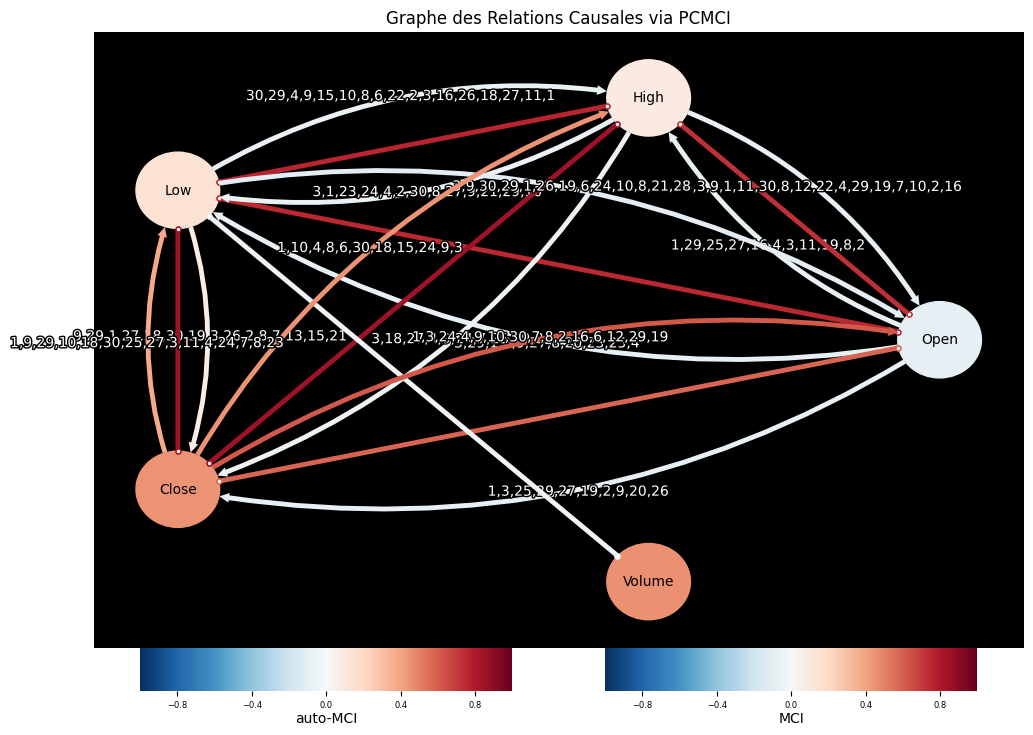

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from tigramite.plotting import plot_graph
from matplotlib.colors import LinearSegmentedColormap
# Vérifier la structure
print("Aperçu des données :")
# print(financial_data_clean.head())
# print("Taille :", financial_data_clean.shape)

# Conversion en numpy array pour Tigramite
data_array = financial_data_clean.values

# Créer un dataframe Tigramite
var_names = [i for i in financial_data_clean.columns]
data = pp.DataFrame(data_array, var_names=var_names)

# Définir PCMCI avec ParCorr comme test d'indépendance
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=data, cond_ind_test=ParCorr(significance='analytic'))

# Définir le lag maximal (adapter selon vos données)
max_lag = 30

# Appliquer PCMCI
results = pcmci.run_pcmci(tau_max=max_lag, pc_alpha=0.05)
val_matrix=results["val_matrix"]
# Afficher les résultats
# print("Résultats des relations causales :")
# print(results['p_matrix'])
# print(results['val_matrix'])

# Dessiner le graphe des relations causales
#fig, ax = plt.subplots(figsize=(10, 8))

# Instead of pcmci.return_graph, use the following to get the graph:
graph = results['graph']  # The graph is already stored in the results dictionary

colors = [(0.0, 'blue'), (0.5, 'lightgreen'), (1.0, 'red')] # Bleu pour -1, Gris pour 0, Rouge pour 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap',colors)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('black')
# Configurations de l'affichage
fig_ax = (fig, ax)  # Utilise une nouvelle figure par défaut
figsize = (12, 8)
save_name = f"Causal_graph_lag_{max_lag}.png"  # Nom du fichier si tu souhaites enregistrer l'image
link_colorbar_label = "MCI"
node_colorbar_label = "auto-MCI"
link_width = None
link_attribute = None
node_pos = None
arrow_linewidth = 3.5
vmin_edges = -1
vmax_edges = 1.0
edge_ticks = 0.4
cmap_edges = "RdBu_r" #custom_cmap
vmin_nodes = -1
vmax_nodes = 1.0
node_ticks = 0.4
cmap_nodes = "RdBu_r" #custom_cmap
node_size = 0.3
node_aspect = None
arrowhead_size = 20
curved_radius = 0.2
label_fontsize = 10
tick_label_size = 6
alpha = 1.0
node_label_size = 10
link_label_fontsize = 10
lag_array = None
show_colorbar = True
inner_edge_style = "dashed"
link_matrix = None
special_nodes = None
show_autodependency_lags = False


# Appeler la fonction de tracé
plot_graph(
    graph=graph,
    val_matrix=val_matrix,
    var_names=var_names,
    fig_ax=fig_ax,
    figsize=figsize,
    save_name=save_name,
    link_colorbar_label=link_colorbar_label,
    node_colorbar_label=node_colorbar_label,
    link_width=link_width,
    link_attribute=link_attribute,
    node_pos=node_pos,
    arrow_linewidth=arrow_linewidth,
    vmin_edges=vmin_edges,
    vmax_edges=vmax_edges,
    edge_ticks=edge_ticks,
    cmap_edges=cmap_edges,
    vmin_nodes=vmin_nodes,
    vmax_nodes=vmax_nodes,
    node_ticks=node_ticks,
    cmap_nodes=cmap_nodes,
    node_size=node_size,
    node_aspect=node_aspect,
    arrowhead_size=arrowhead_size,
    curved_radius=curved_radius,
    label_fontsize=label_fontsize,
    tick_label_size=tick_label_size,
    alpha=alpha,
    node_label_size=node_label_size,
    link_label_fontsize=link_label_fontsize,
    lag_array=lag_array,
    show_colorbar=show_colorbar,
    inner_edge_style=inner_edge_style,
    link_matrix=link_matrix,
    special_nodes=special_nodes,
    show_autodependency_lags=show_autodependency_lags
)
plt.title("Graphe des Relations Causales via PCMCI")
plt.show()

In [ ]:
np.set_printoptions(precision=0)
print(results["p_matrix"])

[[[1.e+000 8.e-012 1.e-001 1.e-010 7.e-001 6.e-004 1.e+000 6.e-001
   3.e-003 1.e-004 9.e-001 2.e-003 6.e-001 2.e-001 9.e-001 6.e-001
   5.e-001 4.e-001 2.e-001 2.e-003 3.e-001 2.e-001 3.e-001 6.e-001
   8.e-001 6.e-002 3.e-004 5.e-001 3.e-002 3.e-010 7.e-003]
  [0.e+000 1.e-008 5.e-002 4.e-003 4.e-003 7.e-002 1.e-001 4.e-001
   2.e-002 2.e-001 5.e-001 4.e-003 1.e-001 1.e+000 8.e-001 1.e-001
   2.e-003 7.e-001 4.e-001 5.e-003 1.e-001 1.e-001 9.e-001 4.e-001
   3.e-001 1.e-004 9.e-001 1.e-003 7.e-001 6.e-007 3.e-001]
  [0.e+000 6.e-009 2.e-006 8.e-011 4.e-002 5.e-001 1.e+000 3.e-001
   5.e-003 3.e-004 9.e-001 5.e-001 8.e-001 9.e-002 4.e-001 2.e-001
   3.e-001 1.e+000 3.e-001 7.e-002 7.e-003 4.e-001 6.e-001 2.e-002
   3.e-001 2.e-002 1.e-001 9.e-004 8.e-002 6.e-010 8.e-002]
  [0.e+000 1.e-010 1.e-003 5.e-007 2.e-001 1.e-001 8.e-001 7.e-001
   7.e-002 7.e-003 7.e-001 3.e-001 2.e-001 4.e-001 9.e-002 5.e-001
   1.e-001 4.e-001 8.e-001 3.e-004 3.e-002 1.e-001 6.e-001 5.e-001
   1.e+000 4.e-0

### Regression comparaison

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Simulation de données financières fictives pour la démonstration
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=200, freq="B")
financial_data_clean = pd.DataFrame({
    "Close": np.random.normal(100, 10, len(dates)),
    "Feature1": np.random.normal(50, 5, len(dates)),
    "Feature2": np.random.normal(30, 3, len(dates))
}, index=dates)

# Initialisation des modèles
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "SVM": SVR()
}

# Fonction pour calculer les erreurs
def calculate_errors(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Résultats pour chaque méthode
errors = []
predictions = []

# Test des deux méthodes : "original" et "PCMCI causality with lag"
methods = ["original", "PCMCI causality with lag"]
for method in methods:
    for model_name, model in models.items():
        if method == "original":
            X = financial_data_clean[["Feature1", "Feature2"]].values
        else:
            X = financial_data_clean[["Feature1"]].values  # Simulation de causalité

        y = financial_data_clean["Close"].values
        model.fit(X, y)
        y_pred = model.predict(X)

        # Stockage des prédictions
        predictions.append(pd.DataFrame({
            "Date": financial_data_clean.index,
            "Close": y_pred,
            "Model": f"{model_name} ({method})"
        }))

        # Calcul des erreurs
        mae, rmse = calculate_errors(y, y_pred)
        errors.append({"Method": method, "Model": model_name, "MAE": mae, "RMSE": rmse})

# Tracer les prédictions avec Plotly Express
predicted_df = pd.concat(predictions)
fig = px.line(predicted_df, x="Date", y="Close", color="Model", title="Actual vs Predicted Close Prices")
fig.add_scatter(x=financial_data_clean.index, y=financial_data_clean["Close"], mode="lines", name="Actual Close Price")
fig.show()

# Tracer les barplots pour les erreurs
error_df = pd.DataFrame(errors)
for metric in ["MAE", "RMSE"]:
    fig_error = px.bar(error_df, x="Method", y=metric, color="Model", barmode="group",
                       title=f"{metric} Comparison Across Methods")
    fig_error.show()


In [ ]:
# prompt: now i would the same plot as the previous cell but this time i don't want to predict all the close. I want 3 trains which give a 3 models which predict the close respectively in 1 day, 1 week and 1 year. You can train on all features this time (i mean the "close" includes but continue to test with and without pcmci features selection as previously) but make the hypothetic "present date" from wich we want to predict and until we train a paramater that i can easily change (start with the date 16 november 2024)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'financial_data_clean' and 'results' (from PCMCI) are defined from previous code

# Prediction parameters
prediction_date = pd.to_datetime('2024-11-16')
prediction_horizons = [1, 7, 30, 365]  # 1 day, 1 week, 1 year

models = {}
predictions = {}
for method in methods:
    for horizon in prediction_horizons:
    # Data preparation for prediction
    # Assuming you'll need to adjust your data based on the prediction horizon.
    # Example (replace with actual feature engineering based on your needs):
    # Extraction des variables causales selon la méthode
        if method == 'original':
            data_for_prediction = financial_data_clean

        else:
            results = pcmci.run_pcmci(tau_max=max_lag, pc_alpha=0.05)
            print("mal_lag",max_lag)
            causal_indices = np.argwhere(results['val_matrix'][:, :, 0] > 0.2)
            # results['val_matrix'][:, :, 0] > 0.2
            # results['p_matrix'][:, :, 0] < 0.05
            causal_features = list(set(causal_indices[:, 0]))
            print(financial_data_clean.iloc[:, causal_features].columns)
            data_for_prediction = financial_data_clean.iloc[:, causal_features].drop(columns=["Close"]).values

    data_for_prediction['Close_future'] = data_for_prediction['Close'].shift(-horizon)
    data_for_prediction = data_for_prediction.dropna()

    X = data_for_prediction.drop(columns=["Close_future", "Close"]).values
    y = data_for_prediction['Close_future'].values

    # Train a model (linear regression in this example)
    model = LinearRegression()
    model.fit(X,y)
    models[horizon] = model

    # Predict for the future horizons
    # Prepare the input for prediction (e.g., last row of X)
    last_data_point = X[-1].reshape(1, -1)  #Reshape to a single sample

    prediction = model.predict(last_data_point)[0]
    predictions[horizon] = prediction

    # Print or visualize the predictions
    for horizon, prediction in predictions.items():
        print(f'Prediction for {horizon} day(s) after {prediction_date}: {prediction}')

    # # Calculer les erreurs
    #     mae, rmse, rae, rrse = calculate_errors(y, prediction)
    #     errors[model_name]["MAE"].append(mae)
    #     errors[model_name]["RMSE"].append(rmse)
    #     errors[model_name]["RAE"].append(rae)
    #     errors[model_name]["RRSE"].append(rrse)
# Générer les graphiques
metrics = ["MAE", "RMSE", "RAE", "RRSE"]
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.legend()
plt.grid(True)
for metric in metrics:
    plot_errors(errors, metric)
plt.show()



# Example visualization (adjust as needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(financial_data_clean.index, financial_data_clean['Close'], label='Actual Close')
# Plot Predictions
prediction_dates = [prediction_date + pd.DateOffset(days=horizon) for horizon in prediction_horizons]
plt.scatter(prediction_dates, predictions.values(), color='red', label='Predictions')
predictions_list = list(predictions.values()) #convert the values to a list
for i, txt in enumerate(predictions.values()):
  plt.annotate(f'{int(txt)}', (prediction_dates[i],predictions_list[i]), textcoords='offset points', xytext=(0, 10), ha='center')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predictions of the close price')
plt.legend()
plt.grid(True)
plt.show()

Prediction for 365 day(s) after 2024-11-16 00:00:00: 237.97931943580488
mal_lag 7
Index(['Open', 'High', 'Low', 'Close'], dtype='object')
mal_lag 7
Index(['Open', 'High', 'Low', 'Close'], dtype='object')
mal_lag 7
Index(['Open', 'High', 'Low', 'Close'], dtype='object')
mal_lag 7
Index(['Open', 'High', 'Low', 'Close'], dtype='object')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# prompt: now i would the same plot as the previous cell but this time i don't want to predict all the close. I want a train on all features this time (i mean the "close" includes) but tain until a certain date (1 week before the last date) and predict the close 1 week after the last date of train (ideally i want to chose the last date of train and the period between the last train and the date when i want to predict the close)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'financial_data_clean' is your DataFrame and 'max_lag' is defined
# Replace this with your actual data loading and preprocessing steps

# ... your existing code to load and preprocess data ...


# Parameters for train/test split
train_end_date = '2024-12-16'  #@param {type:"date"}
prediction_period = 1 #@param {type:"number"}

# Convert date strings to datetime objects for proper comparison
financial_data_clean.index = pd.to_datetime(financial_data_clean.index)
train_end_date = pd.to_datetime(train_end_date)
prediction_start_date = train_end_date + pd.Timedelta(days=1)
prediction_end_date = train_end_date + pd.Timedelta(days=prediction_period)

# Split data
train_data = financial_data_clean[:train_end_date]
test_data = financial_data_clean[prediction_start_date: prediction_end_date]

print(test_data)
# Initialize the model
for method in methods:
    for model_name, model in models.items():
      model = LinearRegression()

# Train the model with all features (including "Close") on train_data
X_train = train_data.drop(columns=["Close"]).values
y_train = train_data["Close"].values
model.fit(X_train, y_train)

# Predict the "Close" price on the test data
X_test = test_data.drop(columns=["Close"]).values
y_pred = model.predict(X_test)
y_test = test_data["Close"].values


# Plotting the actual vs predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Close Price")
plt.plot(test_data.index, y_pred, label="Predicted Close Price")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"Actual vs Predicted Close Prices (Train until {train_end_date.date()}, predict {prediction_period} days)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


#### GRAPH FINAL

In [ ]:
#### GRAPH FINAL

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Préparer les données des arêtes
p_matrix = results["p_matrix"]
val_matrix = results["val_matrix"]
alpha_level = 0.05
edges = []

# Rassembler les liens significatifs
for lag in range(val_matrix.shape[2]):
    significant_links = np.where(val_matrix[:, :, lag] >= alpha_level)
    for i, j in zip(*significant_links):
        if i != j:
            edges.append({
                "x_start": i,
                "y_start": i,
                "x_end": j,
                "y_end": j,
                "strength": val_matrix[i, j, lag],
                "pval": p_matrix[i, j, lag]
            })

edges_df = pd.DataFrame(edges)

labels = list(financial_data_clean.columns)

# Disposition circulaire des nœuds
num_nodes = len(labels)
angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)  # Angles pour placer les nœuds en cercle
radius = 10  # Rayon du cercle
arrowloc = np.linspace(1, num_nodes, endpoint=False)
posi = num_nodes

nodes_df = pd.DataFrame({
    "x": radius * np.cos(angles),  # Coordonnées x
    "y": radius * np.sin(angles),  # Coordonnées y
    "label": labels
})

# Tracer les nœuds
fig = px.scatter(nodes_df, x="x", y="y", text="label", title="Network of Significant Causal Links")
fig.update_traces(marker=dict(size=15, color="lightcoral"), textposition="bottom center")

# Palette de couleur pour le gradient de -1 (bleu) à 1 (rouge)
color_scale = px.colors.diverging.RdBu_r

# Ajouter une échelle de couleur invisible pour la légende avec go.Scatter
fig.add_trace(
    go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(
            colorscale=color_scale,
            cmin=-1, cmax=1,
            colorbar=dict(
                title="Correlation Strength",
                tickvals=[-1, 0, 1],
                ticktext=["-1 (Blue)", "0 (White)", "1 (Red)"],
                len=0.75
            )
        )
    )
)

# Ajouter les arêtes avec orientation et couleur selon la corrélation
for _, edge in edges_df.iterrows():
    x0 = nodes_df.loc[edge["x_start"], "x"]
    y0 = nodes_df.loc[edge["y_start"], "y"]
    x1 = nodes_df.loc[edge["x_end"], "x"]
    y1 = nodes_df.loc[edge["y_end"], "y"]

    # Couleur du lien basée sur la force de la corrélation
    strength = edge["strength"]
    #normalized_strength = (strength + 1) / 2  # Conversion de [-1, 1] vers [0, 1]
    color_rgb = px.colors.sample_colorscale(color_scale, strength)

    # Vérifier que la couleur est une chaîne de caractères et non une liste
    if isinstance(color_rgb, list):
        color_rgb = color_rgb[0]  # Prendre la première couleur de la liste

    # Ajouter la ligne avec flèche
    fig.add_shape(
        type="line",
        x0=x0,
        y0=y0,
        x1=x1,
        y1=y1,
        line=dict(color=color_rgb, width=2)  # Épaisseur fixe
    )

    # Calculer la position de la flèche à 2/3 du chemin



    if lag != 0:
      if lag > 0:
          # i influence j
          arrow_start_x, arrow_start_y = x0, y0
          arrow_end_x, arrow_end_y = x1, y1
      else:
          # j influence i
          arrow_start_x, arrow_start_y = x1, y1
          arrow_end_x, arrow_end_y = x0, y0

      if posi <= 0:
          posi = num_nodes
      arrow_x = arrow_start_x + (arrow_end_x - arrow_start_x) * arrowloc[posi] / num_nodes
      arrow_y = arrow_start_y + (arrow_end_y - arrow_start_y) * arrowloc[posi] / num_nodes
      posi-=1

      fig.add_annotation(
          x=arrow_x,
          y=arrow_y,
          ax=arrow_end_x,
          ay=arrow_end_y,
          showarrow=True,
          arrowhead=1,  # Type de pointe de flèche
          arrowsize=3,  # Taille de la flèche
          arrowcolor=color_rgb  # Couleur de la flèche
      )

    # Ajouter la p-value au centre du lien
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    fig.add_annotation(
        x=arrow_x,
        y=arrow_y,
        text=f'pval: {edge["pval"]:.4f}',
        font=dict(color='black', size=10),
        showarrow=True,
        xanchor="center",
        yanchor="middle"
    )

fig.show()

    nodes = data.columns
    G = nx.DiGraph()
    for i, source in enumerate(nodes):
        for j, target in enumerate(nodes):
            if adjacency_matrix[i, j] != 0:
                G.add_edge(source, target, weight=adjacency_matrix[i, j])

    # Création des positions en cercle pour les nœuds
    pos = nx.circular_layout(G)
    node_positions = {node: (pos[node][0], pos[node][1]) for node in G.nodes()}

    # Liste des coordonnées pour les flèches (arêtes) et les nœuds
    arrow_annotations = []
    arrowloc = 0.7  # Position des flèches sur les relations (0.5 = milieu, 0.7 = plus proche du nœud cible)

    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]  # Coordonnées du nœud source
        x1, y1 = pos[edge[1]]  # Coordonnées du nœud cible

        # Position des flèches le long des relations
        arrow_x = x0 + (x1 - x0) * arrowloc
        arrow_y = y0 + (y1 - y0) * arrowloc

        # Ajout des annotations pour représenter les flèches
        arrow_annotations.append(
            dict(
                ax=x0,
                ay=y0,
                x=arrow_x,
                y=arrow_y,
                xref='x',
                yref='y',
                axref='x',
                ayref='y',
                showarrow=True,
                arrowhead=2,
                arrowsize=1.5,
                arrowwidth=1.5,
                arrowcolor="black"
            )
        )

    node_x = [pos[node][0] for node in G.nodes()]
    node_y = [pos[node][1] for node in G.nodes()]

    # Création de la figure avec Plotly
    fig = go.Figure()

    # Ajout des nœuds avec une taille augmentée
    fig.add_trace(go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        marker=dict(
            size=50,  # Augmentation de la taille des disques
            color='skyblue',
            line=dict(width=2, color='darkblue')  # Bordure des disques pour plus de contraste
        ),
        text=list(G.nodes()),
        textposition='top center',
        hoverinfo='text'
    ))

    # Ajout des annotations pour flèches positionnées
    fig.update_layout(
        title="Causal Graph Based on VAR-LiNGAM (Positioned Arrows)",
        annotations=arrow_annotations,
        showlegend=False,
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        margin=dict(l=0, r=0, t=40, b=0),
        plot_bgcolor="lightblue"
    )

    fig.show()

IndentationError: unexpected indent (<ipython-input-9-7077c924aad0>, line 141)

1. Mode transparents

Votre professeur vous demande de passer en "mode transparents". Cela signifie que vous devez présenter vos résultats de manière claire et concise, en vous concentrant sur les points essentiels. Chaque transparent (diapositive) devrait se concentrer sur un aspect spécifique de votre analyse, en fournissant suffisamment de contexte pour que le public puisse comprendre.
2. Sémantique des variables et dataset

Sur le transparent qui présente le graphique PCMCI, vous devez clairement décrire la signification des variables affichées. Voici comment le faire:

  *"Réseau de causalité des indicateurs financiers d'Apple"* (ou un titre similaire)
  * Description des variables:  
      "Les nœuds du graphique représentent des indicateurs financiers clés extraits des états financiers d'Apple."
      "Voici une liste des variables et leur signification :"
      Ensuite, listez chaque variable affichée sur le graphique avec une brève description (par exemple, "Income_Normalized EBITDA : Bénéfice avant intérêts, impôts, dépréciation et amortissement, normalisé").
  * Source des données:  
      "Les données ont été extraites de Yahoo Finance en utilisant la bibliothèque yfinance."
      "Les données couvrent la période de [date de début] à [date de fin]."

3. Paramètres PCMCI

Sur un transparent séparé, décrivez les paramètres que vous avez utilisés pour exécuter PCMCI.

    Titre du transparent: "Paramètres du modèle PCMCI"
  * Liste des paramètres:  
      "tau_min : 0"
      "tau_max : 1"
      "pc_alpha : 0.1"
      "cond_ind_test : ParCorr(significance='analytic')"
  * Justification des choix:  
      "tau_max a été fixé à 1 pour limiter la recherche de causalité à un décalage temporel maximum d'une période."
      "pc_alpha a été fixé à 0.1 pour un test moins strict, permettant de détecter des relations causales plus faibles."
      "ParCorr a été utilisé comme test d'indépendance conditionnelle avec une signification analytique."

4. Détail de l'output PCMCI et lags

Créez un transparent pour détailler l'output de PCMCI, en mettant l'accent sur les lags.

    Titre du transparent: "Résultats de l'analyse PCMCI"
  * Tableau des liens significatifs:  
      Créez un tableau qui résume les liens causaux significatifs identifiés par PCMCI.
      Les colonnes du tableau devraient être: "Variable de cause", "Variable d'effet", "Lag", "p-value", "Force de la corrélation".
      Remplissez le tableau avec les informations extraites de l'output PCMCI.
  * Interprétation des lags:  
      "Le lag indique le décalage temporel entre la cause et l'effet."
      "Un lag positif signifie que la variable de cause influence la variable d'effet dans le futur."
      "Un lag négatif signifie que la variable de cause influence la variable d'effet dans le passé (ce qui peut indiquer une relation inverse)."

5. Interprétation des résultats

Enfin, consacrez un transparent à l'interprétation des résultats obtenus.

  Titre du transparent: "Interprétation des résultats"
  * Résumé des principales conclusions:  
      "L'analyse PCMCI a révélé des relations causales significatives entre les indicateurs financiers d'Apple."
      "Par exemple, [mentionnez un ou deux liens causaux importants et leur signification]."
      "Ces résultats suggèrent que [faites une interprétation générale des résultats, en reliant les liens causaux à la performance financière d'Apple]."
  * Limites de l'étude:  
      "Il est important de noter que l'analyse PCMCI est basée sur des corrélations et ne peut pas prouver de causalité absolue."
      "D'autres facteurs non pris en compte dans l'analyse pourraient également influencer les relations observées."
  * Prochaines étapes:    
      "Des recherches supplémentaires pourraient explorer [mentionnez des pistes pour des analyses futures, comme l'inclusion d'autres variables ou l'utilisation de méthodes complémentaires]."


### LSTM univarié

In [ ]:
#FINAL FINAL
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import timedelta
import matplotlib.pyplot as plt

# Paramètres
prediction_date = "2023-12-25"
forecast_horizon = 30  # 1 mois boursier (environ 21 jours ouvrés)

# Fonction pour créer des séquences
def create_sequences(data, target_index, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(data[i + time_steps, target_index])
    return np.array(X), np.array(y)

# Étape 1 : Feature selection avec PCMCI
dataframe = pp.DataFrame(financial_data_clean.values, datatime=financial_data_clean.index)
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=ParCorr())
results = pcmci.run_pcmci(tau_max=5, pc_alpha=0.05)

# Sélection des variables les plus causales
causal_indices = np.where(results['val_matrix'][:, :, 0] > 0.2)[0]
selected_features = financial_data_clean.columns[causal_indices]
selected_features = list(set(selected_features).difference({"Close"}))
print("Selected features by PCMCI:", selected_features)

# Étape 2 : Préparation des données pour le LSTM
# LSTM avec sélection de features
data_pcmci = financial_data_clean[selected_features].join(financial_data_clean["Close"])
scaler = MinMaxScaler()
scaled_data_pcmci = scaler.fit_transform(data_pcmci)

# Création des séquences pour le LSTM
time_steps = 30
X_pcmci, y_pcmci = create_sequences(scaled_data_pcmci, target_index=-1, time_steps=time_steps)

# Diviser en ensemble d'entraînement et de test
nearest_date = financial_data_clean.index.get_indexer([pd.Timestamp(prediction_date)], method='nearest')[0]
split_index = nearest_date
X_train_pcmci, X_test_pcmci = X_pcmci[:split_index - time_steps], X_pcmci[split_index - time_steps:]
y_train_pcmci, y_test_pcmci = y_pcmci[:split_index - time_steps], y_pcmci[split_index - time_steps:]

# Étape 3 : Construction et entraînement du modèle LSTM avec PCMCI
model_pcmci = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_pcmci.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_pcmci.compile(optimizer='adam', loss='mse')
model_pcmci.fit(X_train_pcmci, y_train_pcmci, epochs=20, batch_size=32, verbose=1)

# Prédiction avec PCMCI
latest_data_pcmci = scaled_data_pcmci[split_index - time_steps:split_index]
latest_data_pcmci = np.expand_dims(latest_data_pcmci, axis=0)
future_prediction_pcmci = model_pcmci.predict(latest_data_pcmci)
future_close_price_pcmci = scaler.inverse_transform(
    np.concatenate([np.zeros((1, scaled_data_pcmci.shape[1] - 1)), future_prediction_pcmci], axis=1)
)[0, -1]

print(f"Predicted close price with PCMCI for {forecast_horizon} days after {prediction_date}: {future_close_price_pcmci}")



Selected features by PCMCI: ['High', 'Low', 'Open']
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0077
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.0302e-04
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 8.5860e-05
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 9.6450e-05
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 9.7016e-05
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 7.9439e-05
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 9.1974e-05
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 7.8260e-05
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 8.4035e-05
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 5.9687e-05
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 6.2787e-05
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 5.4324e-05
Epoch 13/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 5.8933e-05
Epoch 14/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 6.4192e-05

In [ ]:
# Étape 4 : LSTM sans sélection de features (tous les features)
data_all = financial_data_clean[["Open", "High", "Low", "Close", "Volume"]]
scaled_data_all = scaler.fit_transform(data_all)

# Création des séquences pour le LSTM sans PCMCI
X_all, y_all = create_sequences(scaled_data_all, target_index=-2, time_steps=time_steps)

# Diviser en ensemble d'entraînement et de test
X_train_all, X_test_all = X_all[:split_index - time_steps], X_all[split_index - time_steps:]
y_train_all, y_test_all = y_all[:split_index - time_steps], y_all[split_index - time_steps:]

# Étape 5 : Construction et entraînement du modèle LSTM sans PCMCI
model_all = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_all.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_all.compile(optimizer='adam', loss='mse')
model_all.fit(X_train_all, y_train_all, epochs=20, batch_size=32, verbose=1)

# Prédiction sans PCMCI
latest_data_all = scaled_data_all[split_index - time_steps:split_index]
latest_data_all = np.expand_dims(latest_data_all, axis=0)
future_prediction_all = model_all.predict(latest_data_all)
future_close_price_all = scaler.inverse_transform(
    np.concatenate([np.zeros((1, scaled_data_all.shape[1] - 1)), future_prediction_all], axis=1)
)[0, -1]

print(f"Predicted close price without PCMCI for {forecast_horizon} days after {prediction_date}: {future_close_price_all}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0066
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 1.0931e-04
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 9.8048e-05
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 1.0058e-04
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 9.7102e-05
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 8.2622e-05
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 8.8076e-05
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 7.1442e-05
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 6.9930e-05
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 6.7917e-05
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 5.8508e-05
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 5.2217e-05
Epoch 13/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 5.3920e-05
Epoch 14/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 5.8720e-

In [ ]:
print("scaled_data_all")
print(pd.DataFrame(y_all))
print("scaled_data_pcmci")
print(pd.DataFrame(y_pcmci))

scaled_data_all
             0
0     0.002818
1     0.002670
2     0.002693
3     0.002582
4     0.002660
...        ...
6243  0.994434
6244  0.998548
6245  0.993385
6246  0.999314
6247  1.000000

[6248 rows x 1 columns]
scaled_data_pcmci
             0
0     0.002818
1     0.002670
2     0.002693
3     0.002582
4     0.002660
...        ...
6243  0.994434
6244  0.998548
6245  0.993385
6246  0.999314
6247  1.000000

[6248 rows x 1 columns]


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


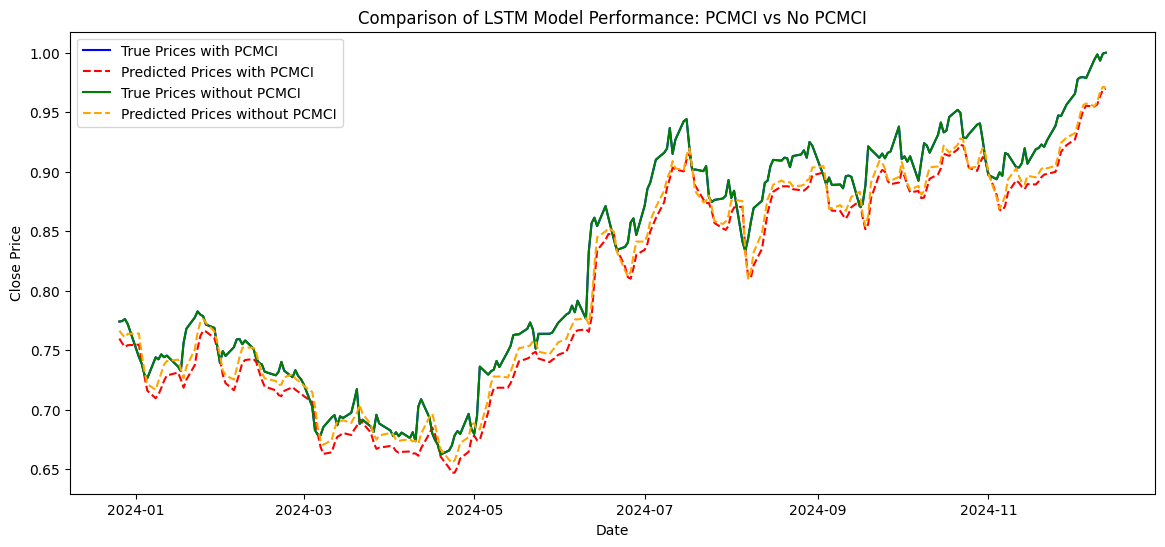

Mean Absolute Error with PCMCI: 0.10978963256952015
Mean Absolute Error without PCMCI: 0.10758118800147017


In [ ]:

# Étape 6 : Comparaison des prédictions et résultats
# Plot des prédictions sur les données de test
y_pred_pcmci = model_pcmci.predict(X_test_pcmci)
y_pred_all = model_all.predict(X_test_all)



# Graphiques comparatifs
plt.figure(figsize=(14, 6))
plt.plot(financial_data_clean.index[split_index:], y_test_pcmci, label='True Prices with PCMCI', color='blue')
plt.plot(financial_data_clean.index[split_index:], y_pred_pcmci, label='Predicted Prices with PCMCI', color='red', linestyle='--')
plt.plot(financial_data_clean.index[split_index:], y_test_all, label='True Prices without PCMCI', color='green')
plt.plot(financial_data_clean.index[split_index:], y_pred_all, label='Predicted Prices without PCMCI', color='orange', linestyle='--')
plt.legend()
plt.title('Comparison of LSTM Model Performance: PCMCI vs No PCMCI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Résumé des résultats
print(f"Mean Absolute Error with PCMCI: {np.mean(np.abs(y_test_pcmci - y_pred_pcmci))}")
print(f"Mean Absolute Error without PCMCI: {np.mean(np.abs(y_test_all - y_pred_all))}")


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcul des valeurs RMSE et MAE pour les deux modèles
mae_pcmci = mean_absolute_error(y_test_pcmci, y_pred_pcmci)
rmse_pcmci = np.sqrt(mean_squared_error(y_test_pcmci, y_pred_pcmci))

mae_all = mean_absolute_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mean_squared_error(y_test_all, y_pred_all))

# Création du graphique comparatif avec Plotly
fig = go.Figure()

# Ajout des courbes pour PCMCI
fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_test_pcmci,
    mode='lines',
    name='True Prices with PCMCI',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_pred_pcmci,
    mode='lines',
    name='Predicted Prices with PCMCI',
    line=dict(color='red', dash='dash')
))

# Ajout des courbes pour le modèle sans PCMCI
fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_test_all,
    mode='lines',
    name='True Prices without PCMCI',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_pred_all,
    mode='lines',
    name='Predicted Prices without PCMCI',
    line=dict(color='orange', dash='dash')
))

# Mise en forme du graphique
fig.update_layout(
    title='Comparison of LSTM Model Performance: PCMCI vs No PCMCI',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    template='plotly_white'
)

# Affichage du graphique
fig.show()

# Affichage des résultats des métriques
print("\nModel Performance Metrics:")
print(f"MAE with PCMCI: {mae_pcmci:.6f}")
print(f"RMSE with PCMCI: {rmse_pcmci:.6f}")
print(f"MAE without PCMCI: {mae_all:.6f}")
print(f"RMSE without PCMCI: {rmse_all:.6f}")



Model Performance Metrics:
MAE with PCMCI: 0.023173
RMSE with PCMCI: 0.026842
MAE without PCMCI: 0.017365
RMSE without PCMCI: 0.021349


### LSTM multivarié

In [ ]:
import pandas as pd

def shift_close_google_new(data, column_name="Close_Google", shift=30):

    # Vérifie si la colonne existe
    if column_name not in data.columns:
        raise ValueError(f"La colonne '{column_name}' n'existe pas dans le dataset.")

    # Créer une copie du DataFrame pour ne pas modifier l'original
    data_new = data.copy()

    # Décale la colonne vers le haut
    data_new[column_name] = data_new[column_name].shift(-shift)

    # Supprime les 30 dernières lignes
    data_new = data_new.iloc[:-shift]

    return data_new

# Exemple d'utilisation
financial_data_clean_shift = shift_close_google_new(financial_data_clean, column_name="Close_Google", shift=30)

# Vérification du résultat
print(financial_data_clean_shift.head())  # Montre les premières lignes ajustées
print(financial_data_clean_shift.tail())  # Montre les dernières lignes ajustées


            Open_Apple  High_Apple  Low_Apple  Close_Apple  Volume_Apple  \
Date                                                                       
2010-01-04    6.429938    6.462174   6.398305     6.447412     493729600   
2010-01-05    6.465187    6.495012   6.424515     6.458559     601904800   
2010-01-06    6.458558    6.484166   6.349198     6.355826     552160000   
2010-01-07    6.379326    6.386858   6.297983     6.344077     477131200   
2010-01-08    6.335641    6.386857   6.298285     6.386254     447610800   

            Open_Google  High_Google  Low_Google  Close_Google  Volume_Google  \
Date                                                                            
2010-01-04    15.632769    15.696602   15.565197     13.420069       78169752   
2010-01-05    15.638505    15.654962   15.497874     13.544992      120067812   
2010-01-06    15.605590    15.605590   15.119365     13.483654      158988852   
2010-01-07    15.195166    15.210128   14.777512     13.534520

In [ ]:
print(pd.DataFrame(financial_data_clean).to_string())

            Open_Apple  High_Apple   Low_Apple  Close_Apple  Volume_Apple  Open_Google  High_Google  Low_Google  Close_Google  Volume_Google  Open_Microsoft  High_Microsoft  Low_Microsoft  Close_Microsoft  Volume_Microsoft  Open_Amazon  High_Amazon  Low_Amazon  Close_Amazon  Volume_Amazon
Date                                                                                                                                                                                                                                                                                             
2010-01-04    6.429938    6.462174    6.398305     6.447412     493729600    15.632769    15.696602   15.565197     15.627782       78169752       23.052240       23.413607      23.029654        23.300680          38409100     6.812500     6.830500    6.657000      6.695000      151998000
2010-01-05    6.465187    6.495012    6.424515     6.458559     601904800    15.638505    15.654962   15.497874     15.558963     

In [ ]:
#FINAL FINAL
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import timedelta
import matplotlib.pyplot as plt

# Paramètres
prediction_date = "2023-12-25"
forecast_horizon = 30  # 1 mois boursier (environ 21 jours ouvrés)

# Fonction pour créer des séquences
def create_sequences(data, target_index, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(data[i + time_steps, target_index])
    return np.array(X), np.array(y)

# Étape 1 : Feature selection avec PCMCI
dataframe = pp.DataFrame(financial_data_clean_shift.values, datatime=financial_data_clean_shift.index)
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=ParCorr())
results = pcmci.run_pcmci(tau_max=5, pc_alpha=0.05)

# Sélection des variables les plus causales
causal_indices = np.where(results['val_matrix'][:, :, 0] > 0.2)[0]
selected_features = financial_data_clean_shift.columns[causal_indices]
selected_features = list(set(selected_features).difference({"Close_Google"}))
print("Selected features by PCMCI:", selected_features)

# Étape 2 : Préparation des données pour le LSTM
# LSTM avec sélection de features
data_pcmci = financial_data_clean_shift[selected_features].join(financial_data_clean_shift["Close_Google"])
scaler = MinMaxScaler()
scaled_data_pcmci = scaler.fit_transform(data_pcmci)

# Création des séquences pour le LSTM
time_steps = 30
X_pcmci, y_pcmci = create_sequences(scaled_data_pcmci, target_index=data_pcmci.columns.get_loc("Close_Google"), time_steps=time_steps)

# Diviser en ensemble d'entraînement et de test
nearest_date = financial_data_clean_shift.index.get_indexer([pd.Timestamp(prediction_date)], method='nearest')[0]
split_index = nearest_date
X_train_pcmci, X_test_pcmci = X_pcmci[:split_index - time_steps], X_pcmci[split_index - time_steps:]
y_train_pcmci, y_test_pcmci = y_pcmci[:split_index - time_steps], y_pcmci[split_index - time_steps:]

# Étape 3 : Construction et entraînement du modèle LSTM avec PCMCI
model_pcmci = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_pcmci.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_pcmci.compile(optimizer='adam', loss='mse')
model_pcmci.fit(X_train_pcmci, y_train_pcmci, epochs=20, batch_size=32, verbose=1)

# Prédiction avec PCMCI
latest_data_pcmci = scaled_data_pcmci[split_index - time_steps:split_index]
latest_data_pcmci = np.expand_dims(latest_data_pcmci, axis=0)
future_prediction_pcmci = model_pcmci.predict(latest_data_pcmci)
future_close_price_pcmci = scaler.inverse_transform(
    np.concatenate([np.zeros((1, scaled_data_pcmci.shape[1] - 1)), future_prediction_pcmci], axis=1)
)[0, -1]

print(f"Predicted close price with PCMCI for {forecast_horizon} days after {prediction_date}: {future_close_price_pcmci}")



Selected features by PCMCI: ['Close_Amazon', 'Open_Google', 'Low_Google', 'Open_Microsoft', 'Volume_Apple', 'High_Google', 'Close_Apple', 'High_Amazon', 'Open_Apple', 'Low_Microsoft', 'Volume_Microsoft', 'Close_Microsoft', 'High_Microsoft', 'Volume_Google', 'Volume_Amazon', 'Low_Apple', 'High_Apple', 'Open_Amazon', 'Low_Amazon']
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0242
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.2504e-04
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.0676e-04
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.7676e-04
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4133e-04
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.8819e-04
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.7992e-04
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6102e-04
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.4203e-04
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 2.2910e-04
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7848e-04
Epoch 12/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2165e-04
Epoch 13/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.1581e-04
Epoch 14/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.9380e-04
Ep

In [ ]:
# Étape 4 : LSTM sans sélection de features (tous les features)
data_all = financial_data_clean_shift
scaled_data_all = scaler.fit_transform(data_all)

# Création des séquences pour le LSTM sans PCMCI
X_all, y_all = create_sequences(scaled_data_all, target_index=data_all.columns.get_loc("Close_Google"), time_steps=time_steps)

# Diviser en ensemble d'entraînement et de test
X_train_all, X_test_all = X_all[:split_index - time_steps], X_all[split_index - time_steps:]
y_train_all, y_test_all = y_all[:split_index - time_steps], y_all[split_index - time_steps:]

# Étape 5 : Construction et entraînement du modèle LSTM sans PCMCI
model_all = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_all.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_all.compile(optimizer='adam', loss='mse')
model_all.fit(X_train_all, y_train_all, epochs=20, batch_size=32, verbose=1)

# Prédiction sans PCMCI
latest_data_all = scaled_data_all[split_index - time_steps:split_index]
latest_data_all = np.expand_dims(latest_data_all, axis=0)
future_prediction_all = model_all.predict(latest_data_all)
future_close_price_all = scaler.inverse_transform(
    np.concatenate([np.zeros((1, scaled_data_all.shape[1] - 1)), future_prediction_all], axis=1)
)[0, -1]

print(f"Predicted close price without PCMCI for {forecast_horizon} days after {prediction_date}: {future_close_price_all}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0166
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.6316e-04
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.0859e-04
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1778e-04
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.1167e-04
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.0059e-04
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.3279e-04
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.4909e-04
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8883e-04
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5682e-04
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.7495e-04
Epoch 12/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.1239e-04
Epoch 13/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0700e-04
Epoch 14/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.7960e-04
Ep

In [ ]:
print("scaled_data_all")
print(pd.DataFrame(y_all))
print("scaled_data_pcmci")
print(pd.DataFrame(y_pcmci))

scaled_data_all
             0
0     0.017588
1     0.017814
2     0.018110
3     0.017736
4     0.017108
...        ...
3708  0.989074
3709  0.997040
3710  0.994295
3711  0.979008
3712  0.970827

[3713 rows x 1 columns]
scaled_data_pcmci
             0
0     0.017588
1     0.017814
2     0.018110
3     0.017736
4     0.017108
...        ...
3708  0.989074
3709  0.997040
3710  0.994295
3711  0.979008
3712  0.970827

[3713 rows x 1 columns]


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0     0.704715
1     0.705883
2     0.708758
3     0.711296
4     0.712078
5     0.712211
6     0.710617
7     0.707255
8     0.703622
9     0.701348
10    0.700775
11    0.701423
12    0.699692
13    0.698037
14    0.695759
15    0.694878
16    0.694192
17    0.691940
18    0.689102
19    0.685481
20    0.683220
21    0.683315
22    0.685356
23    0.689103
24    0.694560
25    0.701312
26    0.707403
27    0.713681
28    0.720007
29    0.727779
30    0.734468
31    0.741625
32    0.748174
33    0.753192
34    0.756984
dtype: float64
250   NaN
251   NaN
252   NaN
253   NaN
254   NaN
dtype: float64
0     0.724001
1     0.740573
2     0.732689
3     0.719871
4     0.724161
5     0.707161
6     0.695094
7     0.698311
8     0.705981
9     0.714240
10    0.713543
11    0.679273
12    0.686298
13    0.672891
14    0.684046
15    0.676966
16    0.656640
17    0.652994
18    0.646182
19    0.662164
20    0.667688
21  

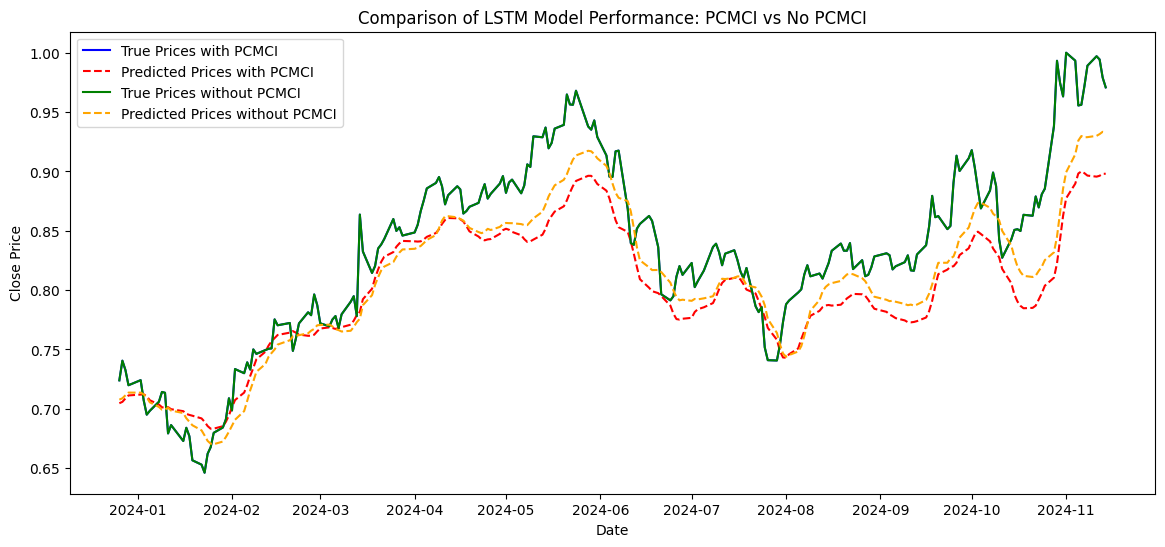

Mean Absolute Error with PCMCI: 0.0814090791272631
Mean Absolute Error without PCMCI: 0.08290717434386392


In [ ]:

# Étape 6 : Comparaison des prédictions et résultats
# Plot des prédictions sur les données de test
y_pred_pcmci = model_pcmci.predict(X_test_pcmci)
y_pred_all = model_all.predict(X_test_all)

import numpy as np
import pandas as pd

def shift_predictions_into_future(predictions, shift=30):

    # S'assurer que les prédictions sont 1D
    predictions_1d = predictions.ravel()  # Conversion en 1D si nécessaire

    # Convertit les prédictions en pandas Series
    pred_series = pd.Series(predictions_1d)

    # Insère les NaN au début pour décaler les prédictions dans le futur
    pred_shifted = pd.Series([np.nan] * shift + pred_series.tolist())

    return pred_shifted

def shift_predictions_into_future2(predictions, shift=30):

    # S'assurer que les prédictions sont 1D
    predictions_1d = predictions.ravel()  # Conversion en 1D si nécessaire

    # Convertit les prédictions en pandas Series
    pred_series = pd.Series(predictions_1d)

    # Insère les NaN au début pour décaler les prédictions dans le futur
    pred_shifted = pd.Series(pred_series.tolist() + [np.nan] * shift)

    return pred_shifted

# Appliquer aux prédictions
y_pred_pcmci_shifted = shift_predictions_into_future(y_pred_pcmci, shift=30)
y_pred_all_shifted = shift_predictions_into_future(y_pred_all, shift=30)
y_test_pcmci_shifted = shift_predictions_into_future2(y_test_pcmci, shift=30)
y_test_all_shifted = shift_predictions_into_future2(y_test_all, shift=30)

# Vérification
print(y_pred_pcmci_shifted.head(35))  # Les premières lignes incluront des NaN
print(y_pred_pcmci_shifted.tail(5))  # Les dernières lignes contiendront les prédictions
print(y_test_pcmci_shifted.head(35))  # Les premières lignes incluront des NaN
print(y_test_pcmci_shifted.tail(5))


# Graphiques comparatifs
plt.figure(figsize=(14, 6))
plt.plot(financial_data_clean.index[split_index:], y_test_pcmci_shifted, label='True Prices with PCMCI', color='blue')
plt.plot(financial_data_clean.index[split_index:], y_pred_pcmci_shifted, label='Predicted Prices with PCMCI', color='red', linestyle='--')
plt.plot(financial_data_clean.index[split_index:], y_test_all_shifted, label='True Prices without PCMCI', color='green')
plt.plot(financial_data_clean.index[split_index:], y_pred_all_shifted, label='Predicted Prices without PCMCI', color='orange', linestyle='--')
plt.legend()
plt.title('Comparison of LSTM Model Performance: PCMCI vs No PCMCI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Résumé des résultats
print(f"Mean Absolute Error with PCMCI: {np.mean(np.abs(y_test_pcmci - y_pred_pcmci))}")
print(f"Mean Absolute Error without PCMCI: {np.mean(np.abs(y_test_all - y_pred_all))}")


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcul des valeurs RMSE et MAE pour les deux modèles
mae_pcmci = mean_absolute_error(y_test_pcmci, y_pred_pcmci)
rmse_pcmci = np.sqrt(mean_squared_error(y_test_pcmci, y_pred_pcmci))

mae_all = mean_absolute_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mean_squared_error(y_test_all, y_pred_all))

# Création du graphique comparatif avec Plotly
fig = go.Figure()

# Ajout des courbes pour PCMCI
fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_test_pcmci_shifted,
    mode='lines',
    name='True Prices with PCMCI',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_pred_pcmci_shifted,
    mode='lines',
    name='Predicted Prices with PCMCI',
    line=dict(color='red', dash='dash')
))

# Ajout des courbes pour le modèle sans PCMCI
fig.add_trace(go.Scatter(
    x=financial_data_clean.index[split_index:],
    y=y_test_all_shifted,
    mode='lines',
    name='True Prices without PCMCI',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=financial_data_clean_shift.index[split_index:],
    y=y_pred_all_shifted,
    mode='lines',
    name='Predicted Prices without PCMCI',
    line=dict(color='orange', dash='dash')
))

# Mise en forme du graphique
fig.update_layout(
    title='Comparison of LSTM Model Performance: PCMCI vs No PCMCI',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    template='plotly_white'
)

# Affichage du graphique
fig.show()

# Affichage des résultats des métriques
print("\nModel Performance Metrics:")
print(f"MAE with PCMCI: {mae_pcmci:.6f}")
print(f"RMSE with PCMCI: {rmse_pcmci:.6f}")
print(f"MAE without PCMCI: {mae_all:.6f}")
print(f"RMSE without PCMCI: {rmse_all:.6f}")



Model Performance Metrics:
MAE with PCMCI: 0.037633
RMSE with PCMCI: 0.047192
MAE without PCMCI: 0.029665
RMSE without PCMCI: 0.036584


In [ ]:
# Ajout de la colonne 'lag' à edges_df
edges_df["lag"] = 0  # Initialize 'lag' column to 0

# Update 'lag' values based on the edge's corresponding lag
lag_index = 0
for lag in range(val_matrix.shape[2]):
    significant_links = np.where(val_matrix[:, :, lag] >= alpha_level)
    num_links = len(significant_links[0])  # Get the number of significant links for this lag

    # Update 'lag' values for the current set of links
    edges_df.loc[lag_index : lag_index + num_links - 1, "lag"] = lag

    lag_index += num_links  # Move to the next set of links

In [ ]:
# Calcul de l'impact causal pour chaque nœud
impact_causal = {}
for node in range(len(labels)):
    impact = 0
    for edge in edges:
        if edge["x_start"] == node or edge["x_end"] == node:
            impact += abs(edge["strength"]) / edge["pval"]  # Pondération par 1/p-value
    impact_causal[node] = impact

# Normalisation de l'impact causal entre 0 et 1
max_impact = max(impact_causal.values())
impact_causal_normalized = {node: impact / max_impact for node, impact in impact_causal.items()}

# Répartition des nœuds en profondeur selon l'impact causal
nodes_df["z"] = [impact_causal_normalized[i] for i in range(len(nodes_df))]

In [ ]:
def calculate_node_depth(edges, num_nodes):
    node_depths = {i: 0 for i in range(num_nodes)}  # Initialiser la profondeur de chaque nœud à 0

    # Parcourir les arêtes et mettre à jour la profondeur des nœuds en fonction des lags cumulés
    for edge in edges:
        node_depths[edge["x_end"]] = max(
            node_depths[edge["x_end"]],
            node_depths[edge["x_start"]] + edge["lag"]  # Ajouter le lag au chemin précédent
        )

    return node_depths

# Exemple d'utilisation
node_depths = calculate_node_depth(edges_df, num_nodes)

TypeError: string indices must be integers

In [ ]:
def remove_redundant_edges(edges, node_depths):
    filtered_edges = []
    for edge in edges:
        # Vérifier si le lien est direct et s'il n'y a pas de chemin plus court
        if node_depths[edge["x_end"]] == node_depths[edge["x_start"]] + edge["lag"]:
            filtered_edges.append(edge)
    return filtered_edges

# Exemple d'utilisation
filtered_edges = remove_redundant_edges(edges_df, node_depths)

In [ ]:
import plotly.graph_objects as go

# Créer la figure 3D
fig = go.Figure()

# Ajouter les nœuds
fig.add_trace(
    go.Scatter3d(
        x=nodes_df["x"],
        y=nodes_df["y"],
        z=[0] * len(nodes_df),  # Placer tous les nœuds sur le plan z=0
        text=nodes_df["label"],
        mode="markers+text",
        marker=dict(size=10, color="lightcoral"),
        textposition="bottom center",
    )
)
nodes_df["z"] = [node_depths[i] for i in range(len(nodes_df))]
# Ajouter les arêtes
for _, edge in filtered_edges:
    x0 = nodes_df.loc[edge["x_start"], "x"]
    y0 = nodes_df.loc[edge["y_start"], "y"]
    x1 = nodes_df.loc[edge["x_end"], "x"]
    y1 = nodes_df.loc[edge["y_end"], "y"]
    z0 = nodes_df.loc[edge["x_start"], "z"]
    z1 = nodes_df.loc[edge["x_end"], "z"]
    fig.add_trace(
        go.Scatter3d(
            x=[x0, x1],
            y=[y0, y1],
            z=[z0, z1],  # Relier le nœud de départ (z=0) au nœud d'arrivée (z=lag)
            mode="lines",
            line=dict(color="gray", width=2),
        )
    )


# Personnaliser la mise en page
fig.update_layout(
    title="Network of Significant Causal Links (3D)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Lag",
    ),
)

# Afficher le graphique
fig.show()